<div style="text-align:center; font-family:Tahoma, Arial; line-height:1.8;">

  <div style="font-size:42px; font-weight:bold; color:#0F8298;">
    machine learning 09
  </div>

  <div style="font-size:28px; font-weight:600; color:#6C3BAA; margin-top:8px;">
    Classification / KNN 
  </div>

  <div style="font-size:18px; color:#4b4f9c;">
</div>
نزدیکترین همسایگی

<hr style="width:60%; margin:20px auto; border:1px solid #ddd;">

<font color=497890 size=3>

اهداف: پس از تکمیل این تمرین، شما قادر خواهید بود

از روش $K$ نزدیک‌ترین همسایه برای طبقه‌بندی داده‌ها استفاده کنید


<font color=GREEN size=5>
HAKAN Fatemi (www.hooko.ir)


____
</div> </div>

**نزدیک‌ترین همسایه** یک الگوریتم یادگیری نظارت‌شده است. در این روش، داده‌ها با نقاط داده‌ای متناظر با طبقه‌بندی‌شان «آموزش» می‌بینند. برای پیش‌بینی کلاس یک نقطه داده مشخص، این الگوریتم کلاس‌های $«K»$ نقطه داده نزدیک‌تر را در نظر می‌گیرد و کلاسی را که اکثریت این $«K»$ نقطه داده نزدیک به آن تعلق دارند، به عنوان کلاس پیش‌بینی شده انتخاب می‌کند

### در اینجا یک نمایش بصری از الگوریتم $-K$نزدیک‌ترین همسایه آورده شده است

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">


در این حالت، ما نقاط داده‌ای از کلاس $A$ و $B$ داریم. می‌خواهیم پیش‌بینی کنیم که ستاره (نقطه داده آزمون) چیست. اگر مقدار $k$ را 3 در نظر بگیریم (3 نقطه داده نزدیک)، پیش‌بینی کلاس $B$ را به دست می‌آوریم. اما اگر مقدار $k$ را 6 در نظر بگیریم، پیش‌بینی کلاس $A$ را به دست خواهیم آورد.

با این توصیف، در نظر گرفتن مقدار $k$ بسیار مهم است. امیدواریم از این نمودار درک بهتری از الگوریتم $K$-نزدیک‌ترین همسایه به دست آورده باشید. این الگوریتم هنگامی که پیش‌بینی طبقه‌بندی نقطه آزمون را انجام می‌دهد، «$K$» نزدیک‌ترین همسایه‌ها (نقاط داده) را در نظر می‌گیرد

<h1>فهرست مطالب</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">درباره مجموعه داده</a></li>
        <li><a href="#visualization_analysis">نمایش و تحلیل داده‌ها</a></li>
        <li><a href="#classification">طبقه‌بندی</a></li>
    </ol>
</div>
<br>
<hr>


In [ ]:
# !pip install scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

<div id="about_dataset">
    <h2>درباره مجموعه داده</h2>
</div>


فرض کنید یک ارائه‌دهنده خدمات مخابراتی، پایگاه مشتریان خود را بر اساس الگوهای استفاده از خدمات تقسیم‌بندی کرده و مشتریان را به چهار گروه دسته‌بندی نموده است. اگر بتوان از داده‌های جمعیت‌شناختی برای پیش‌بینی عضویت گروهی استفاده کرد، شرکت می‌تواند پیشنهادهای خود را برای مشتریان بالقوه فردی سفارشی‌سازی کند. این یک مسئله $classification$ است. یعنی با توجه به مجموعه داده با برچسب‌های از پیش تعریف شده، نیاز به ساختن مدلی داریم که برای پیش‌بینی کلاس یک مورد جدید یا ناشناخته استفاده شود

این مثال بر استفاده از داده‌های جمعیت‌شناختی مانند منطقه، سن و وضعیت تأهل برای پیش‌بینی الگوهای استفاده متمرکز است

فیلد هدف، با نام **$custcat$**، دارای چهار مقدار ممکن است که مطابق با چهار گروه مشتری به شرح زیر می‌باشد

$1- Basic Service$

$2- E-Service$

$3- Plus Service$

$4- Total Service$

هدف ما ساختن یک $classifier$ برای پیش‌بینی کلاس موارد ناشناخته است. ما از نوع خاصی از طبقه‌بندی به نام $K$ $nearest neighbour$ استفاده خواهیم کرد


In [3]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv"
response = requests.get(url)

with open("teleCust1000t.csv", "wb") as f:
    f.write(response.content)

In [4]:
df = pd.read_csv("teleCust1000t.csv")
df

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3


<div id="visualization_analysis">
    <h2>نمایش و تحلیل داده‌ها</h2> 
</div>


#### بیایید ببینیم در مجموعه داده ما از هر کلاس چند نمونه وجود دارد

In [5]:
df["custcat"].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

281 Plus Service, 

266 Basic-service, 

236 Total Service, 

217 E-Service customers


شما می‌توانید به راحتی با استفاده از تکنیک‌های بصری‌سازی داده‌های خود را بررسی کنید

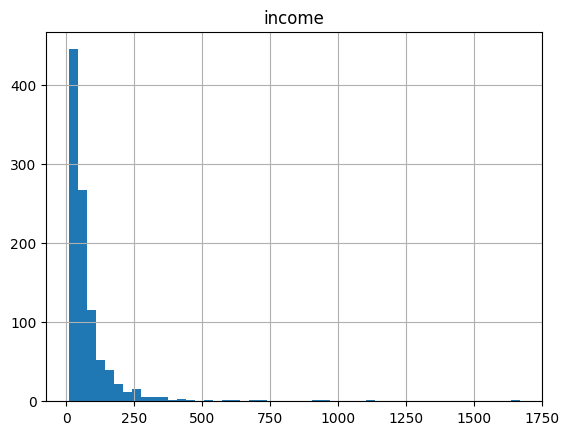

In [6]:
df.hist(column="income", bins=50)
plt.show()

### مجموعه ویژگی‌ها

بیایید مجموعه ویژگی‌ها، $X$ را تعریف کنیم

In [7]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='str')

برای استفاده از کتابخانه $scikit-learn$، باید $DataFrame$ پانداس را به یک آرایه $Numpy$ تبدیل کنیم

In [8]:
X = df[["region", "tenure","age", "marital", "address", "income", "ed", "employ","retire", "gender", "reside"]].values  # float تبدیل به نوع
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

برچسب‌های ما چه چیزهایی هستند؟

In [9]:
y = df["custcat"].values
y[0:5]

array([1, 4, 3, 1, 3])

## نرمال‌سازی داده‌ها

استانداردسازی داده‌ها به داده‌ها میانگین صفر و واریانس واحد می‌دهد. این یک روش خوب است، به ویژه برای الگوریتم‌هایی مانند $KNN$ که مبتنی بر فاصله بین نقاط داده هستند

In [10]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### تقسیم $Train$ و $Test$

**$Out\ of\ Sample\ Accuracy$** درصد پیش‌بینی‌های صحیحی است که مدل روی داده‌هایی انجام می‌دهد که روی آنها **$train$** نشده است. انجام **$train$** و **$test$** روی یک **$dataset$** واحد به احتمال زیاد منجر به **$out-of-sample\ accuracy$** پایین می‌شود، به دلیل احتمال **$overfitting$** مدل.

مهم است که مدل‌های ما **$out-of-sample\ accuracy$** بالایی داشته باشند، زیرا هدف هر مدلی، البته، انجام پیش‌بینی‌های صحیح روی داده‌های ناشناخته است. پس چگونه می‌توانیم **$out-of-sample\ accuracy$** را بهبود بخشیم؟ یکی از راه‌ها استفاده از روش ارزیابی به نام **$Train/Test\ Split$** است.

**$Train/Test\ Split$** شامل تقسیم **$dataset$** به مجموعه‌های **$training$** و **$testing$** به صورت جداگانه است که متقابلاً منحصر به فرد هستند. پس از آن، شما با مجموعه **$training$**، مدل را **$train$** می‌دهید و با مجموعه **$testing$** آن را **$test$** می‌کنید.

این روش ارزیابی دقیق‌تری از **$out-of-sample\ accuracy$** ارائه می‌دهد زیرا **$testing\ dataset$** بخشی از داده‌هایی نیست که برای **$train$** مدل استفاده شده‌اند. این رویکرد برای مسائل دنیای واقعی واقع‌بینانه‌تر است.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ("Train set:", X_train.shape,  y_train.shape)
print ("Test set:", X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


<div id="classification">
    <h2>طبقه‌بندی</h2>
</div>


الگوریتم $K$ نزدیک‌ترین همسایه ($KNN$)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

### آموزش

بیایید الگوریتم را با $k$=4 شروع کنیم

In [13]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",4
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


### پیش‌بینی

می‌توانیم از مدل برای انجام پیش‌بینی روی مجموعه آزمون استفاده کنیم

In [14]:
yhat = neigh.predict(X_test)
yhat[:5]

array([1, 1, 3, 2, 4])

### ارزیابی دقت

در طبقه‌بندی چندبرچسبی، **$accuracy\ classification\ score$** تابعی است که دقت زیرمجموعه را محاسبه می‌کند 

این تابع معادل تابع **$jaccard\_score$** است 

در اصل، این معیار میزان تطابق بین برچسب‌های واقعی و برچسب‌های پیش‌بینی شده در مجموعه آزمون را محاسبه می‌کند

In [15]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


## تمرین

آیا می‌توانید مدل را مجدداً بسازید، اما این بار با $k$=6؟

In [16]:
# کد خود را اینجا بنویسید



<details><summary>برای مشاهده راه‌حل اینجا کلیک کنید</summary>

```python
k = 6
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat6 = neigh6.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

```

</details>


#### سایر مقادیر $K$ چطور؟

$K$ در الگوریتم $KNN$، تعداد همسایه‌های نزدیکی است که بررسی می‌شوند. این مقدار باید توسط کاربر مشخص شود. پس چگونه می‌توانیم مقدار مناسب $K$ را انتخاب کنیم؟

راه‌حل کلی این است که بخشی از داده‌های خود را برای تست دقت مدل کنار بگذارید. سپس $K$=1 را انتخاب کنید، از بخش آموزش برای مدل‌سازی استفاده کنید و دقت پیش‌بینی را با استفاده از تمام نمونه‌های مجموعه تست محاسبه کنید. این فرآیند را با افزایش $K$ تکرار کنید و ببینید کدام $K$ برای مدل شما بهترین است

ما می‌توانیم دقت $KNN$ را برای مقادیر مختلف $K$ محاسبه کنیم

In [17]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    # آموزش مدل و پیش‌بینی
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

#### رسم دقت مدل برای تعداد مختلف همسایه‌ها

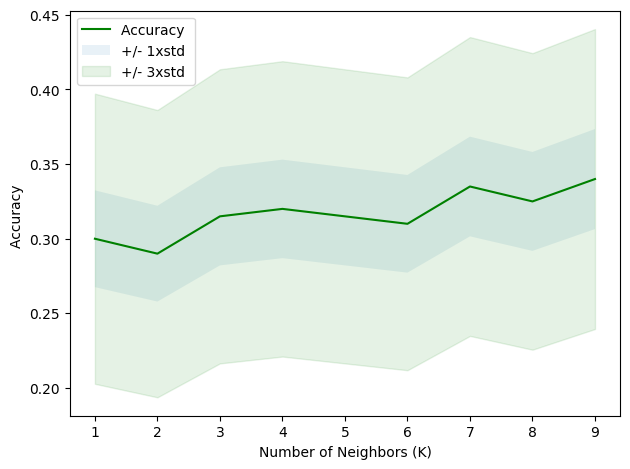

In [18]:
plt.plot(range(1,Ks),mean_acc,"g")
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(("Accuracy ", "+/- 1xstd","+/- 3xstd"))
plt.ylabel("Accuracy ")
plt.xlabel("Number of Neighbors (K)")
plt.tight_layout()
plt.show()

In [19]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9


___
___ 
### نسخه‌ی پیشرفته
___
___

In [20]:
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.cm as cm

# $KNN$ طبقه بندی

در این بخش، یک طبقه‌بندی $KNN$ را از پایه پیاده‌سازی خواهیم کرد

In [22]:
class KNNClassifier:
    def __init__(self, k=3, distance_func=None):
        self.k = k
        if distance_func is None:
            self.distance_func = self._euclidean_distance
        else:
            self.distance_func = distance_func

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def _minkowski_distance(self, x1, x2, p=3):
        return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)

    def predict(self, X):
        predictions = []
        for index, x in enumerate(X):
            distances = [self.distance_func(x, x_train) for x_train in self.X_train]

            # KNN اندیس‌های
            k_indices = np.argsort(distances)[:self.k]
            # KNN برچسب‌های
            k_neighbor_labels = self.y_train[k_indices]
            # رأی اکثریت
            counts = np.bincount(k_neighbor_labels.astype(int))
            predicted_label = np.argmax(counts)
            predictions.append(predicted_label)

        return np.array(predictions)


با استفاده از طبقه‌بندی $KNN$ تعریف شده، می‌توانیم از معیارهای فاصله مختلف استفاده کنیم. اجازه دهید چند نقطه نمونه تصادفی تولید کنیم

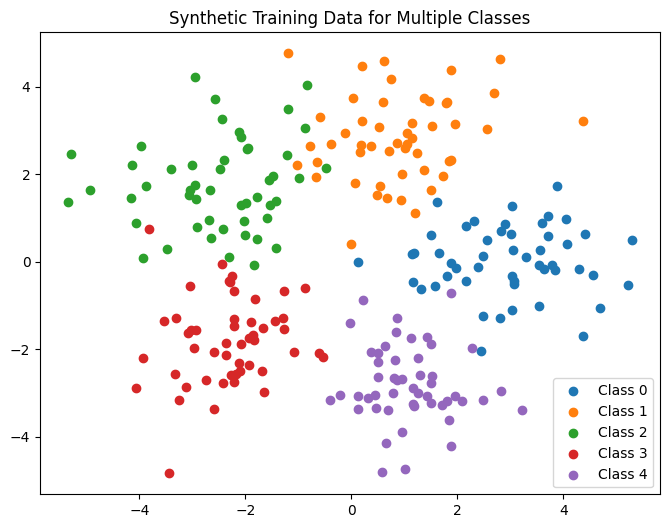

In [23]:
def generate_synthetic_data(m=3, num_points_per_class=100, cluster_std=1.0):
    np.random.seed(40)
    X = []
    y = []
    means = []
    for i in range(m):
        angle = 2 * np.pi * i / m
        radius = 3
        mean = [radius * np.cos(angle), radius * np.sin(angle)]
        means.append(mean)
        cov = [[cluster_std, 0], [0, cluster_std]]
        class_data = np.random.multivariate_normal(mean, cov, num_points_per_class)
        X.append(class_data)
        y += [i] * num_points_per_class

    X = np.vstack(X)
    y = np.array(y)
    return X, y, means

m = 5  # تعداد کلاس‌ها
num_points_per_class = 50
cluster_std = 1.0

X, y, class_means = generate_synthetic_data(m=m, num_points_per_class=num_points_per_class, cluster_std=cluster_std)

plt.figure(figsize=(8,6))
colors = plt.colormaps["tab10"].colors
for i in range(m):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=colors[i], label=f"Class {i}")
plt.title("Synthetic Training Data for Multiple Classes")
plt.legend()
plt.show()


In [24]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y, random_state=42)

print(f"Total samples: {X.shape[0]}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Total samples: 250
Training samples: 200
Testing samples: 50


اجازه دهید به صورت بصری نیز نمایش دهیم

In [26]:
def plot_decision_boundaries(classifier, X, y, means, title="Decision Boundaries"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    h = 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,8))
    colors = plt.get_cmap("tab10", np.unique(y).size + 1)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap=colors)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colors, edgecolor="k", s=40)

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend(handles=[
        plt.Line2D([0], [0], marker="o", color="w", label=f"Class {i}",
                   markerfacecolor=colors(i), markersize=10) for i in range(np.unique(y).size)
    ], loc="upper right")
    plt.show()

In [27]:
distance_func = euclidean_distance

k = 5
knn = KNNClassifier(k=k, distance_func=distance_func)
knn.fit(X_train, y_train)

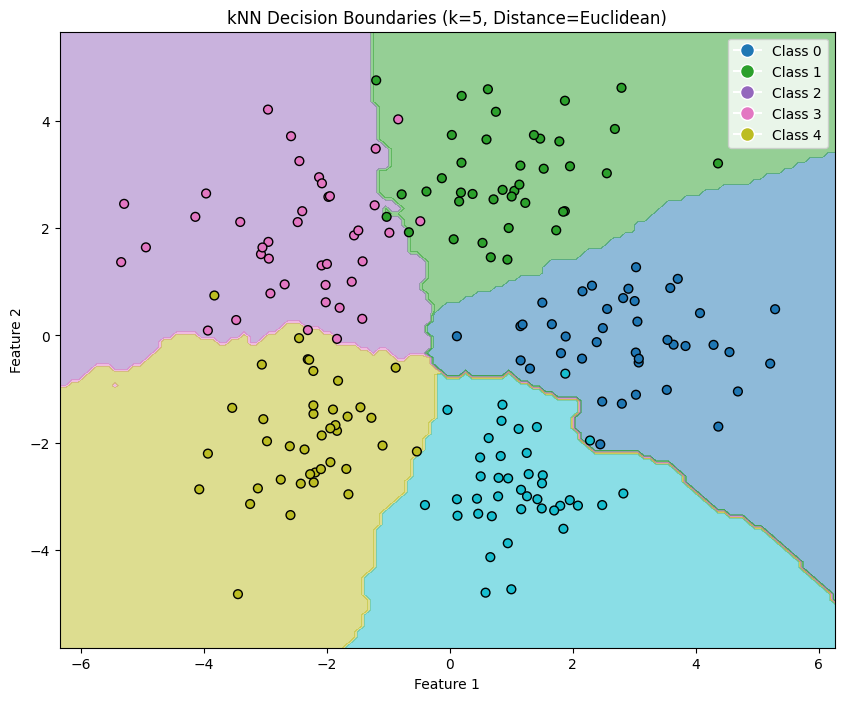

In [28]:
plot_decision_boundaries(
    classifier=knn,
    X=X_train,
    y=y_train,
    means=class_means,
    title=f"kNN Decision Boundaries (k={k}, Distance=Euclidean)"
)

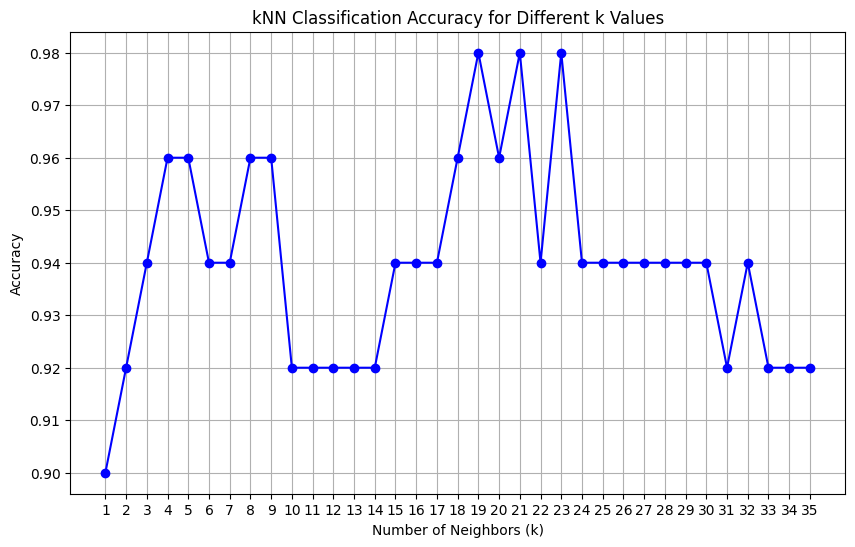

In [29]:
k_values = range(1, 36)

accuracies = []

for k in k_values:
    knn = KNNClassifier(k=k, distance_func=euclidean_distance)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# K رسم دقت برای مقادیر مختلف
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker="o", linestyle="-", color="b")
plt.title("kNN Classification Accuracy for Different k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()


<h2>می‌خواهید بیشتر یاد بگیرید؟</h2>

پلتفرم **هوکو** یک بستر جامع تحلیلی و هوش مصنوعی است که مجموعه‌ای از الگوریتم‌های یادگیری ماشین، ابزارهای تحلیل داده و راهکارهای پیش‌بینی هوشمند را در اختیار شما قرار می‌دهد.
این پلتفرم به شما کمک می‌کند تا تصمیم‌های دقیق‌تر، سریع‌تر و مبتنی بر داده بگیرید؛ 

چه به‌صورت فردی، چه در سطح تیمی و یا در مقیاس سازمانی

___

اکنون می‌توانید نسخه آزمایشی رایگان هوکو را فعال کرده و قدرت هوش مصنوعی را در تصمیم‌گیری‌های خود تجربه کنید

 <a href="https://hooko.ir">HOOKO.ir شروع تجربه در </a>

 ___

## Author

Mahdi Fatemi (HAKAN)

Instagram: @Fatemi_303

09220630140

## web
www.hooko.ir

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2025-11-06 | 1.0  | HAKAN Fatemi  |  ... |

## <h3 align="center"> © HOOKO.IR Corporation. All rights reserved. <h3/>
